Import calls

In [1]:
import sys
sys.path.append('../')

from src.load_jules_output_file import load_jules_output_file_xarray
from src.data_conversions.to_daily_value import to_daily_total, get_daily_values_at_time
from src.plotting.plot_daily import plot_daily_total
from src.plotting.plot_col_at_daily_time import plot_col_at_daily_time

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, date


# Load JULES netcdf file

File details.

In [2]:
folder = "~/Desktop/JULES/data/data_runs/stomatal_optimisation_runs/testing/"

# FI_Lom files
#file_name = "FI_Lom-fsmc_comp.H.nc"
#file_name_2 = "24_03_19_12_15_FI_Lom-JULES_vn7.4-presc0.H.nc"

# LBA_BAN files
file_name = "LBA_BAN-fsmc_comp.H.nc"
file_name_2 = "24_03_19_12_15_LBA_BAN-JULES_vn7.4-presc0.H.nc"

file_address = folder + file_name
file_address_2 = folder + file_name_2

#xrange = [date(2008,1,1),date(2010,1,1)] # FI_Lom
xrange = [date(2004,1,1),date(2006,1,1)] # LBA_BAN

Load and print the file

In [3]:
data = load_jules_output_file_xarray(file_address)

print(data)

<xarray.Dataset>
Dimensions:                (time: 24792, nt: 2, y: 1, x: 1, pft: 9, soil: 4)
Coordinates:
  * time                   (time) datetime64[ns] 2004-01-02T01:00:00 ... 2006...
    latitude               (y, x) float32 ...
    longitude              (y, x) float32 ...
Dimensions without coordinates: nt, y, x, pft, soil
Data variables: (12/26)
    time_bounds            (time, nt) datetime64[ns] ...
    gpp_gb                 (time, y, x) float32 ...
    resp_p_gb              (time, y, x) float32 ...
    resp_s_gb              (time, y, x) float32 ...
    ftl_gb                 (time, y, x) float32 ...
    latent_heat            (time, y, x) float32 ...
    ...                     ...
    soil_root_k            (time, soil, y, x) float32 ...
    psi_root_zone_pft      (time, pft, y, x) float32 ...
    et_stom_gb             (time, y, x) float32 ...
    psi_leaf_pft           (time, pft, y, x) float32 ...
    som_transpiration_pft  (time, pft, y, x) float32 ...
    cica_ratio

load the second file

In [4]:
data_2 = load_jules_output_file_xarray(file_address_2)
print(data_2)

<xarray.Dataset>
Dimensions:                (time: 24792, nt: 2, y: 1, x: 1, pft: 9, soil: 4)
Coordinates:
  * time                   (time) datetime64[ns] 2004-01-02T01:00:00 ... 2006...
    latitude               (y, x) float32 ...
    longitude              (y, x) float32 ...
Dimensions without coordinates: nt, y, x, pft, soil
Data variables: (12/28)
    time_bounds            (time, nt) datetime64[ns] ...
    gpp_gb                 (time, y, x) float32 ...
    resp_p_gb              (time, y, x) float32 ...
    resp_s_gb              (time, y, x) float32 ...
    ftl_gb                 (time, y, x) float32 ...
    latent_heat            (time, y, x) float32 ...
    ...                     ...
    et_stom_gb             (time, y, x) float32 ...
    psi_leaf_pft           (time, pft, y, x) float32 ...
    som_transpiration_pft  (time, pft, y, x) float32 ...
    cica_ratio_pft         (time, pft, y, x) float32 ...
    carbon_gain_pft        (time, pft, y, x) float32 ...
    hydraulic_c

# Plot the total per day values of some variables

['time_bounds', 'gpp_gb', 'resp_p_gb', 'resp_s_gb', 'ftl_gb', 'latent_heat', 'rad_net', 'sw_down', 'precip', 't1p5m_gb', 'q1p5m_gb', 'cv', 'lai_gb', 'lai', 'soil_wp', 'smcl', 'smc_tot', 'sthu', 'sathh', 'soil_k', 'soil_root_k', 'psi_root_zone_pft', 'et_stom_gb', 'psi_leaf_pft', 'som_transpiration_pft', 'cica_ratio_pft', 'gpp_gb_g_pertimestep']


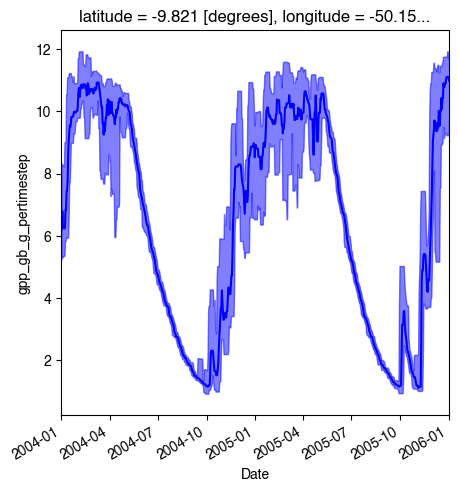

In [5]:
# Convert gpp_gb from kgC m-2 s-1 to gC m-2 h-1
data['gpp_gb_g_pertimestep'] = data['gpp_gb'] * 1000 * 60*60

print(list(data.keys()))

plot_daily_total(data, 'gpp_gb_g_pertimestep', smoothing = 10, x_range = xrange)

Lets plot the daily gpp for two different files so we can compare them.

Text(0, 0.5, 'total gross primary product (g day$^{-1})$')

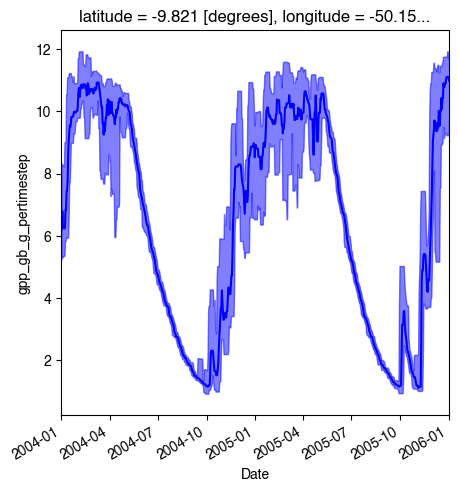

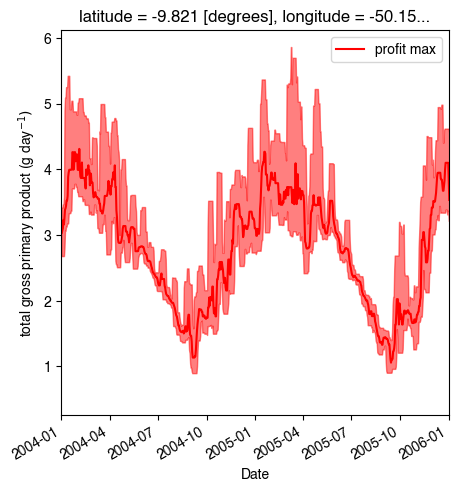

In [6]:
# Convert gpp_gb from kgC m-2 s-1 to gC m-2 h-1
data_2['gpp_gb_g_pertimestep'] = data_2['gpp_gb'] * 1000 * 60*60

plot_daily_total(data, 'gpp_gb_g_pertimestep', smoothing = 10, x_range = xrange, label = 'JULES')
plot_daily_total(data_2, 'gpp_gb_g_pertimestep', smoothing = 10, x_range = xrange, c = 'red', label = 'profit max')

plt.legend()
plt.ylabel("total gross primary product (g day$^{-1})$")

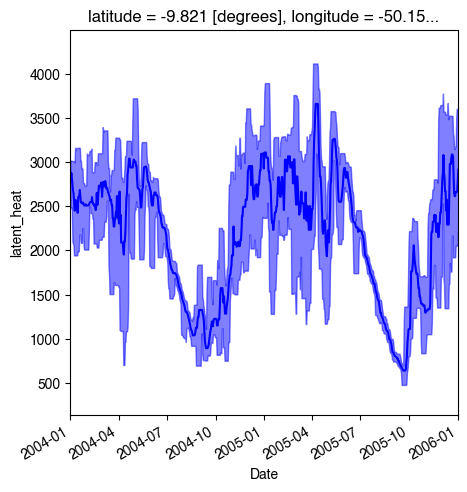

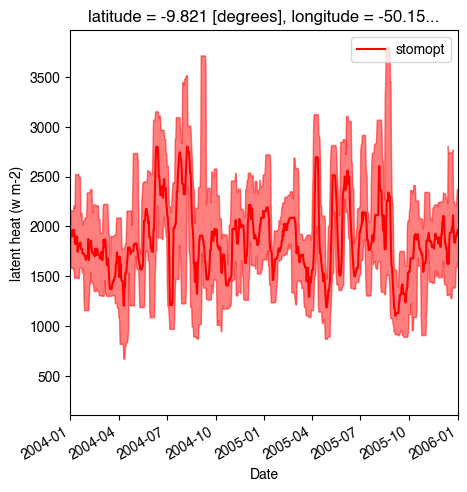

In [7]:
plot_daily_total(data, 'latent_heat', smoothing = 10, x_range = xrange, label = 'JULES')
plot_daily_total(data_2, 'latent_heat', smoothing = 10, x_range = xrange, label = 'stomopt', c = 'red')

plt.ylabel('latent heat (w m-2)')
plt.legend()

# Plot the ratio of the intercellular to atmospheric CO2 concentration at midday.

Lets plot the $c_i$ to $c_a$ ratio at midday, since this is roughly when the tree should be most water stressed.

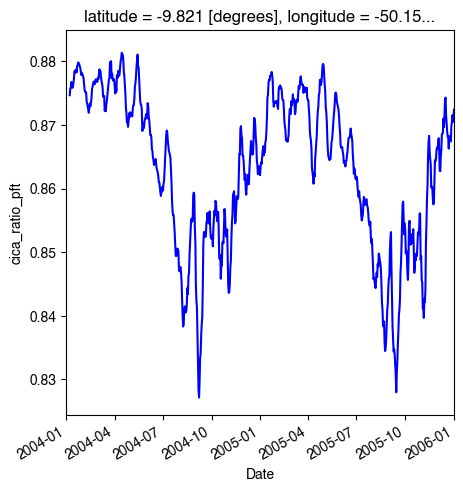

In [8]:
plot_col_at_daily_time(data.isel(pft=0), 'cica_ratio_pft', time='12:00:00', x_range = xrange, smoothing = 10)

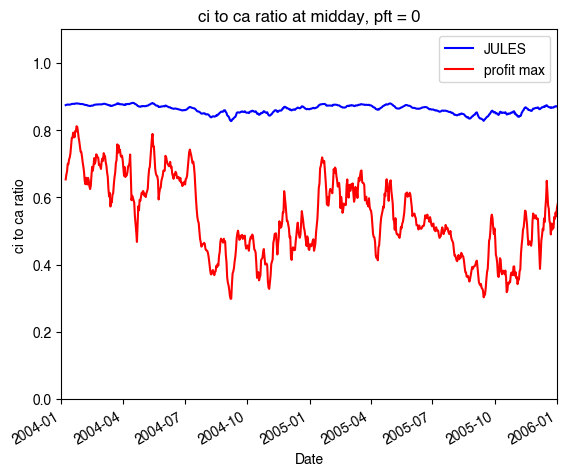

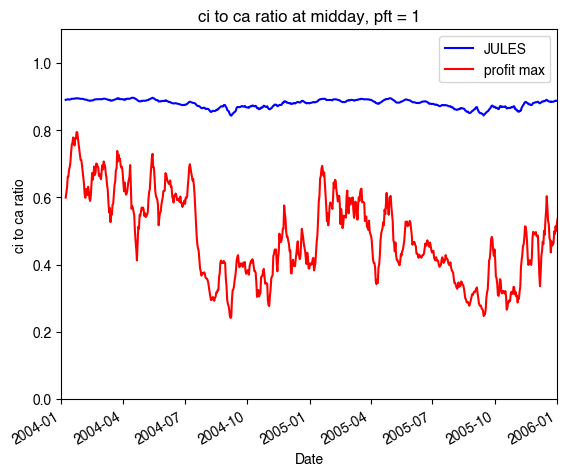

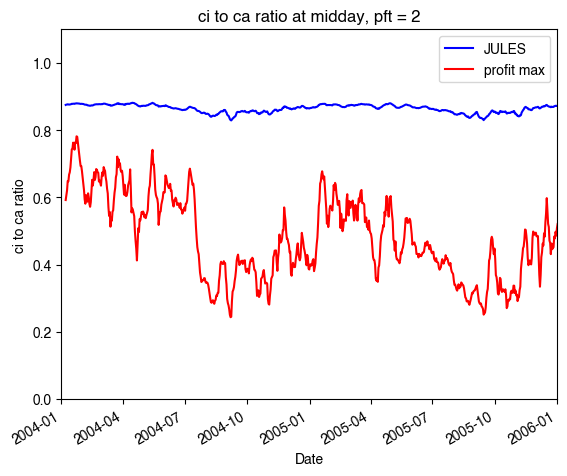

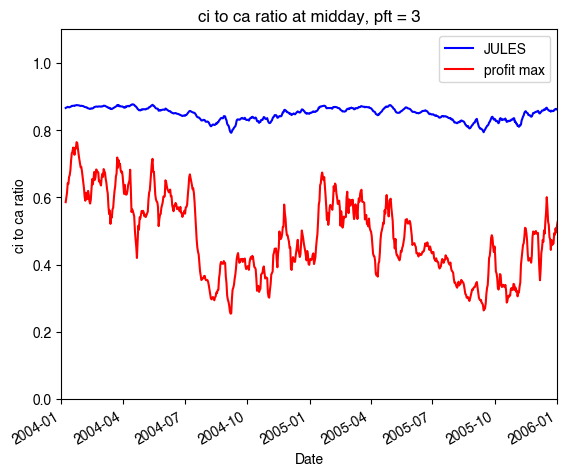

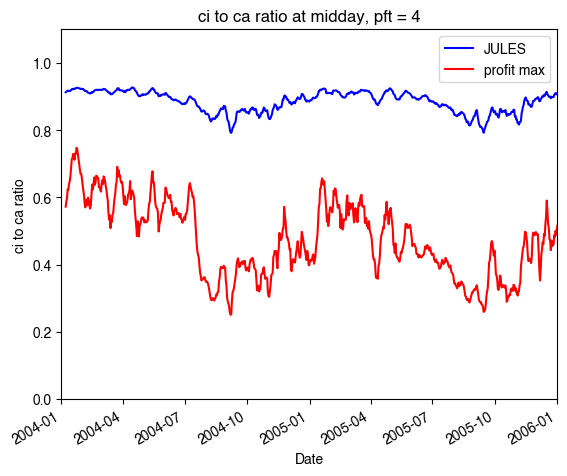

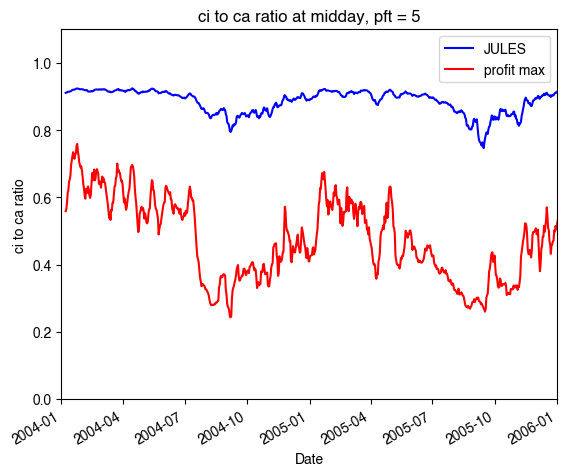

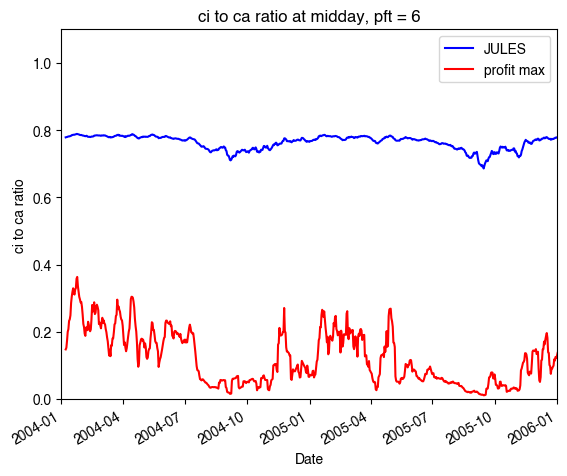

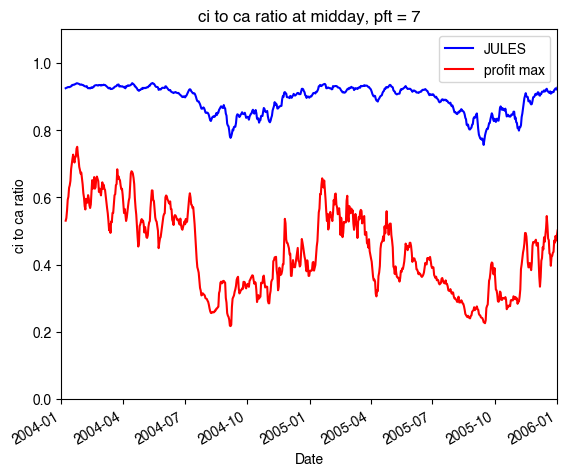

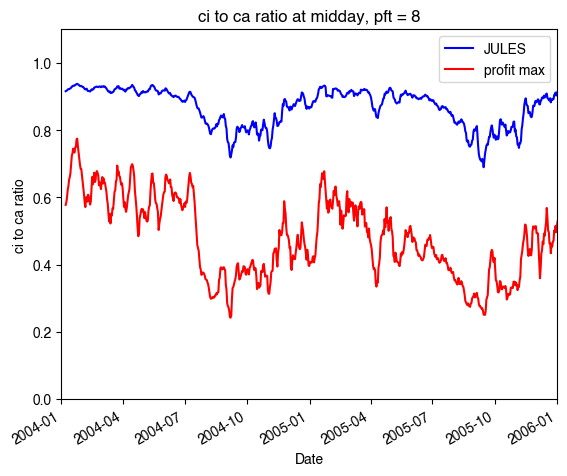

In [9]:
for i in range(9):
    
    plt.figure()
    axis = plt.gca()

    plot_col_at_daily_time(data.isel(pft=i), 'cica_ratio_pft', time='12:00:00', x_range = xrange, smoothing = 10, label = 'JULES', axis = axis)
    plot_col_at_daily_time(data_2.isel(pft=i), 'cica_ratio_pft', time='12:00:00', x_range = xrange, smoothing = 10, c = 'red', label = 'profit max', axis = axis)
    
    plt.ylim(0.0,1.1)
    
    plt.title("ci to ca ratio at midday, pft = {}".format(i))
    plt.ylabel("ci to ca ratio")
    plt.legend()

Plot leaf water potential at mid day

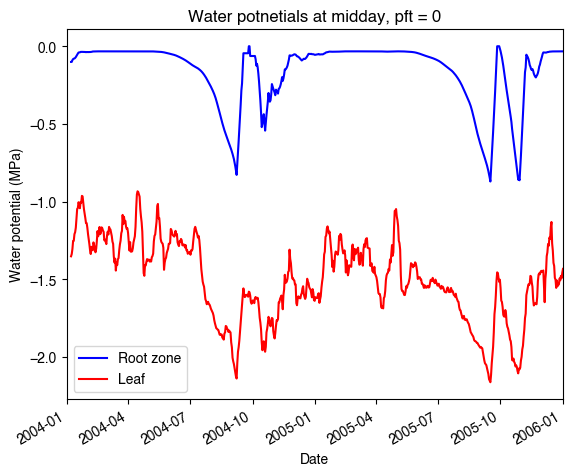

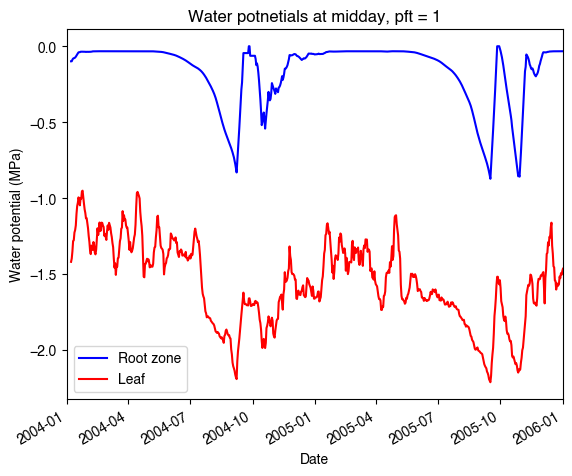

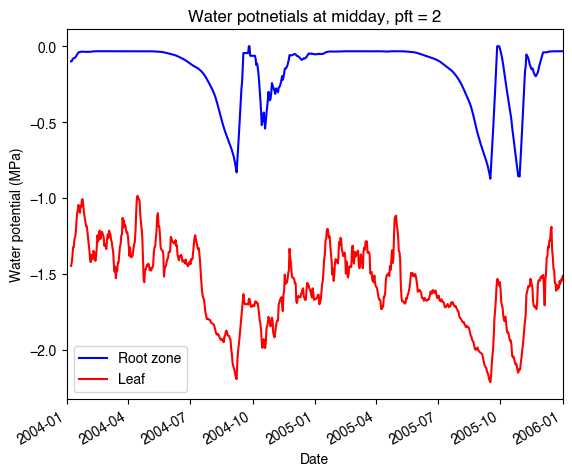

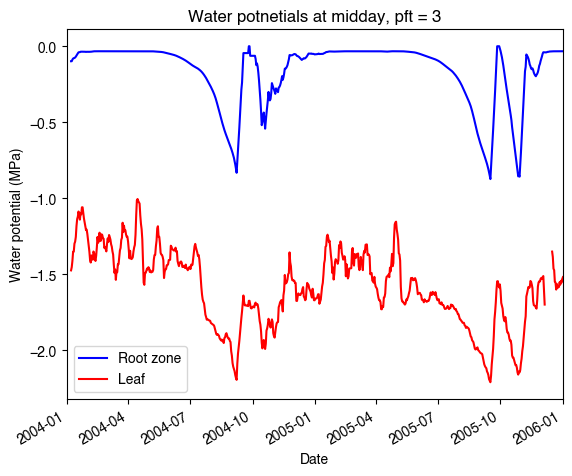

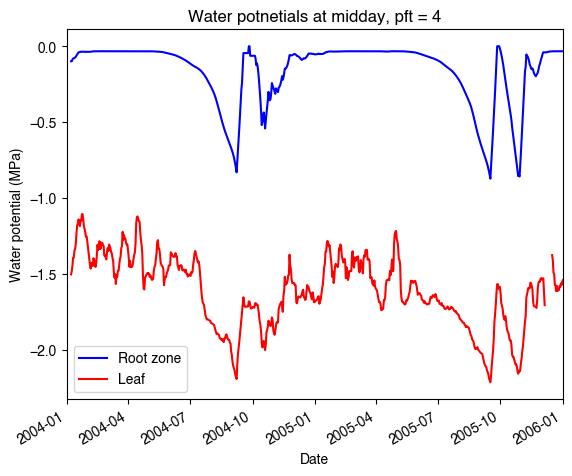

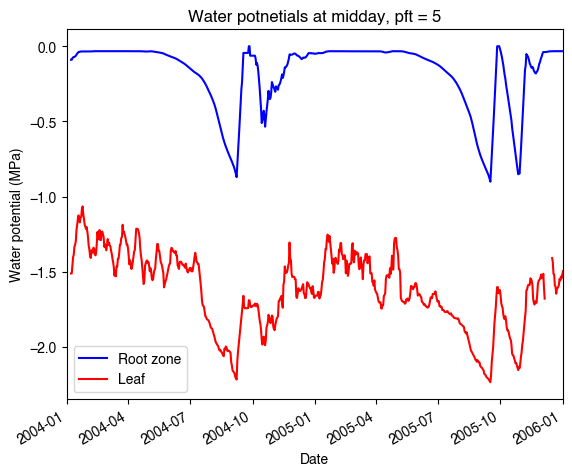

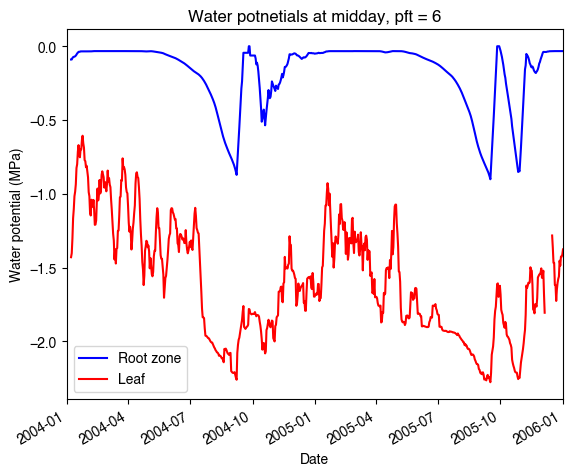

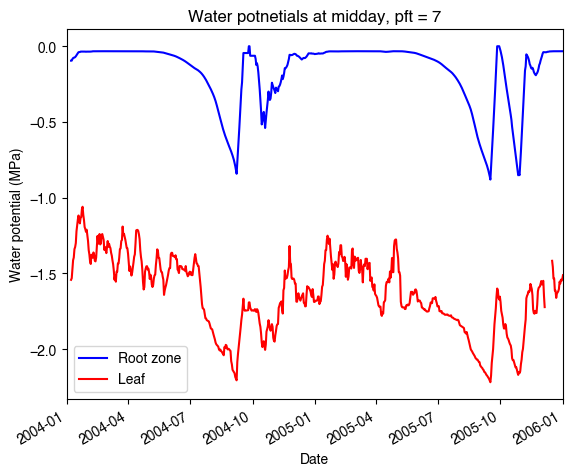

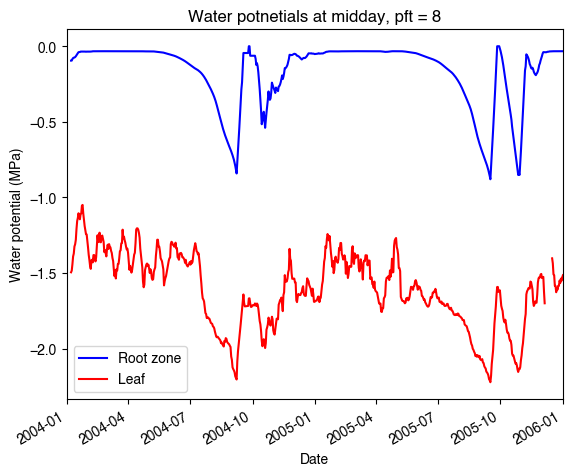

In [10]:
for i in range(9):
    
    plt.figure()
    axis = plt.gca()

    plot_col_at_daily_time(data_2.isel(pft=i), 'psi_root_zone_pft', time='12:00:00', x_range = xrange, smoothing = 10, label = 'Root zone', axis = axis)
    plot_col_at_daily_time(data_2.isel(pft=i), 'psi_leaf_pft', time='12:00:00', x_range = xrange, smoothing = 10, c = 'red', label = 'Leaf', axis = axis)
    
    plt.title("Water potnetials at midday, pft = {}".format(i))
    plt.ylabel("Water potential (MPa)")
    plt.legend()

# Profit

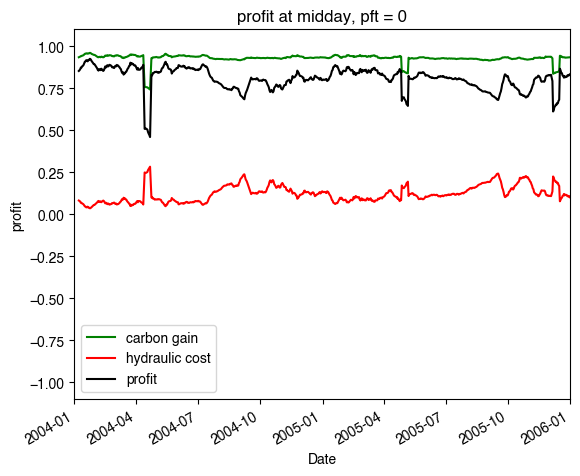

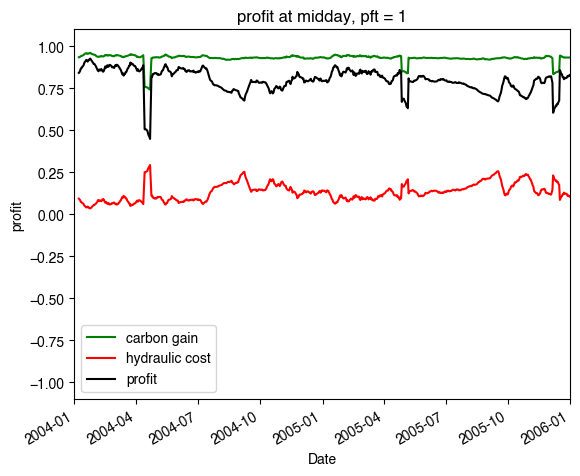

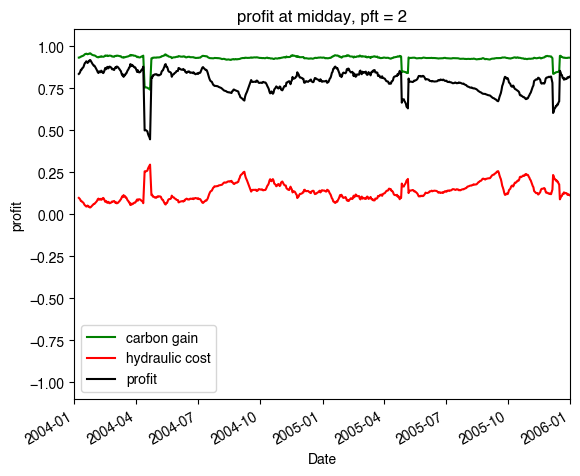

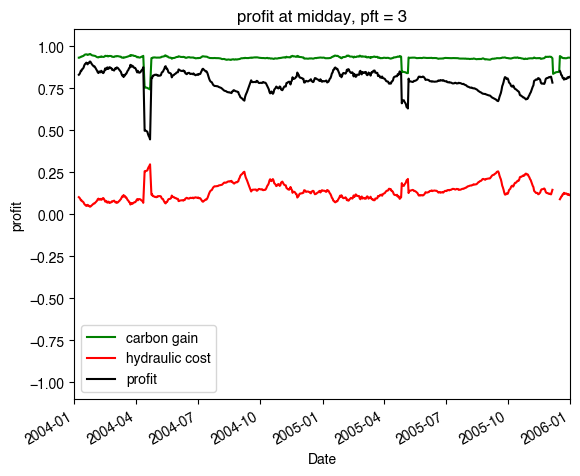

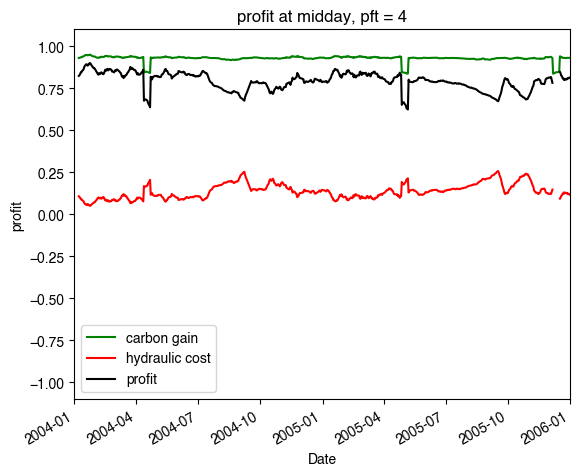

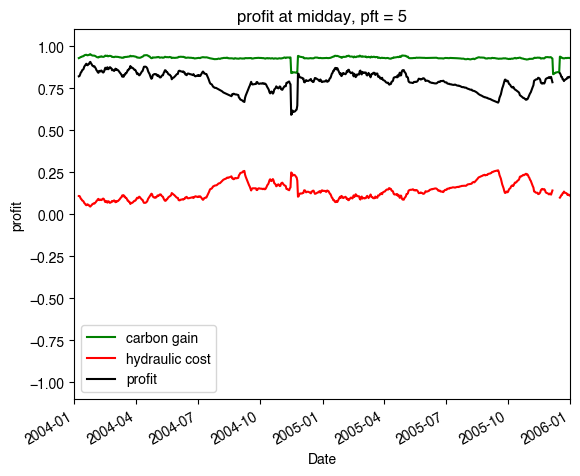

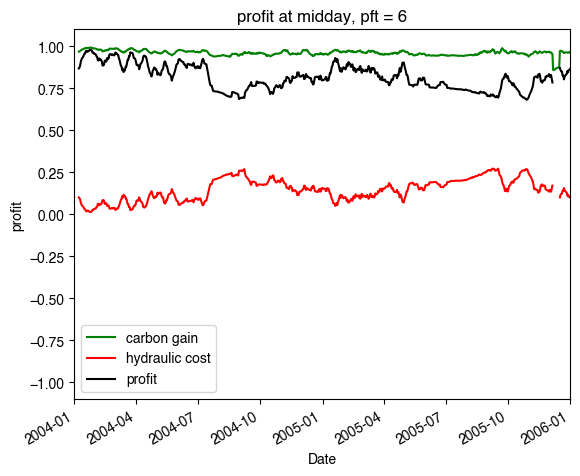

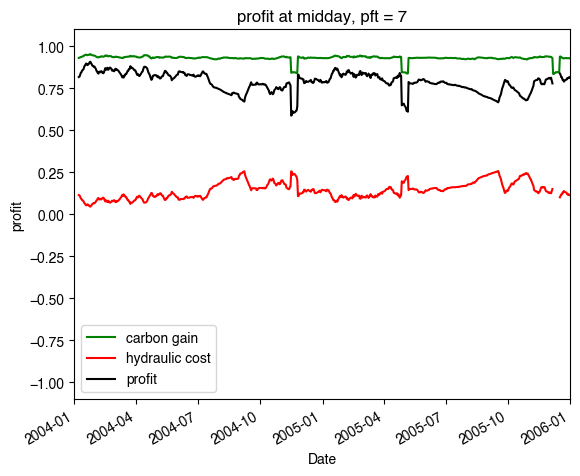

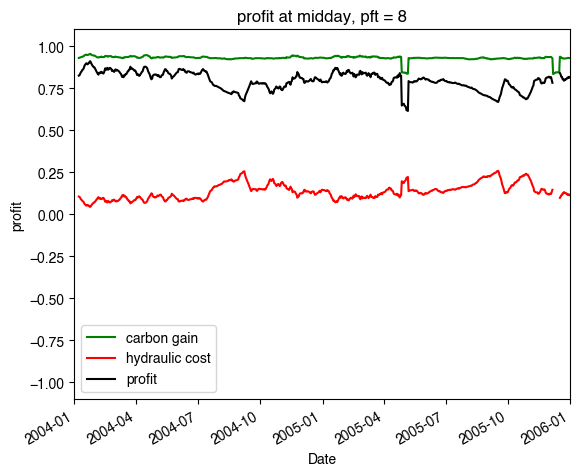

In [11]:
data_2['profit'] = data_2['carbon_gain_pft'] - data_2['hydraulic_cost_pft']

for i in range(9):
    
    plt.figure()
    axis = plt.gca()
    
    plot_col_at_daily_time(data_2.isel(pft=i), 'carbon_gain_pft', time='12:00:00', x_range = xrange, smoothing = 10, c = 'green', label = 'carbon gain', axis = axis)
    plot_col_at_daily_time(data_2.isel(pft=i), 'hydraulic_cost_pft', time='12:00:00', x_range = xrange, smoothing = 10, c = 'red', label = 'hydraulic cost', axis = axis)
    plot_col_at_daily_time(data_2.isel(pft=i), 'profit', time='12:00:00', x_range = xrange, smoothing = 10, c = 'black', label = 'profit', axis = axis)
    
    plt.ylim(-1.1,1.1)
    
    plt.title("profit at midday, pft = {}".format(i))
    plt.ylabel("profit")
    plt.legend()